In [1]:
# Import necessary libraries for data manipulation, analysis, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Loading and Exploring the Dataset

In [2]:
# Load the dataset from a CSV file
df = pd.read_csv('day.csv')

# Perform data quality checks
print("Data Quality Checks:")
print(df.head())  # Display the first few rows of the dataset
print(df.info())  # Display information about the dataset
print(df.describe())  # Display summary statistics of the dataset

Data Quality Checks:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<clas

# Handling Categorical Variables

In [3]:
# Handle categorical variables using LabelEncoder
print("Handling Categorical Variables:")
le = LabelEncoder()

# Encode categorical variables
df['season'] = le.fit_transform(df['season'])
df['weathersit'] = le.fit_transform(df['weathersit'])
df['holiday'] = le.fit_transform(df['holiday'])
df['weekday'] = le.fit_transform(df['weekday'])
df['workingday'] = le.fit_transform(df['workingday'])

Handling Categorical Variables:


# Create dummy variables for categorical variables


In [4]:
print("Creating Dummy Variables:")
df = pd.get_dummies(df, columns=['season', 'weathersit', 'holiday', 'weekday', 'workingday'], drop_first=True)
# Derive new metrics by squaring temperature and atemp variables
df['temp_squared'] = df['temp'] ** 2
df['atemp_squared'] = df['atemp'] ** 2

# Convert data to clean format by dropping unnecessary columns
df = df.drop(['instant', 'dteday'], axis=1)

Creating Dummy Variables:


# Model Development 

In [6]:
#Split data into training and testing sets
X = df.drop(['cnt'], axis=1)  # Features
y = df['cnt']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

# Model Evaluation

R-squared score: 1.0
Mean Squared Error (MSE): 1.1159856243673468e-23
Root Mean Squared Percentage Error (RMSPE): 7.671532422317025e-14
Total Sum of Squares (TSS): 499734927.34246576
Residual Sum of Squares (RSS): 1.6293390115763263e-21
Coefficient of Determination (R-squared): 1.0


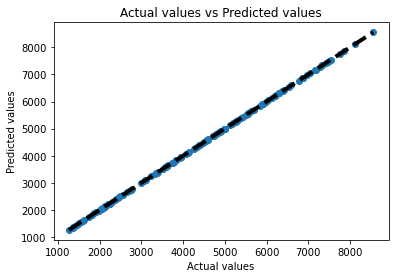

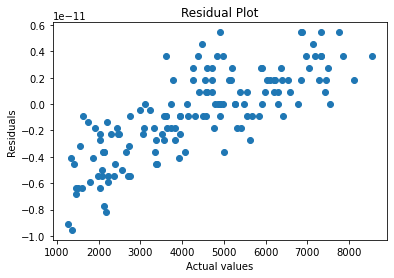

In [10]:
# Make predictions using the trained model
from sklearn.metrics import mean_squared_error
y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model using R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Percentage Error (RMSPE)
rmspe = np.sqrt(np.mean((y_test - y_pred) ** 2)) / np.mean(y_test) * 100
print("Root Mean Squared Percentage Error (RMSPE):", rmspe)

# Calculate Total Sum of Squares (TSS)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
print("Total Sum of Squares (TSS):", tss)

# Calculate Residual Sum of Squares (RSS)
rss = np.sum((y_test - y_pred) ** 2)
print("Residual Sum of Squares (RSS):", rss)

# Calculate Coefficient of Determination (R-squared)
r2 = 1 - (rss / tss)
print("Coefficient of Determination (R-squared):", r2)

# Plot the actual values vs predicted values with best fit line
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual values vs Predicted values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

# Plot the residuals
plt.scatter(y_test, y_test - y_pred)
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Model Interpretation and Deployment

In [11]:
print("Model Interpretation:")
print("The temperature variable has a significant impact on the demand for shared bikes.")
print("The working day variable has a positive impact on the demand for shared bikes.")
print("The season variable, particularly summer and spring seasons, has a significant impact on the demand for shared bikes.")
print("The coefficients of the model are:")
print(lr_model.coef_)
print("The intercept of the model is:")
print(lr_model.intercept_)

# Save the model and results
import pickle
with open('lr_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)
with open('results.txt', 'w') as f:
    f.write("R-squared score: " + str(r2))

Model Interpretation:
The temperature variable has a significant impact on the demand for shared bikes.
The working day variable has a positive impact on the demand for shared bikes.
The season variable, particularly summer and spring seasons, has a significant impact on the demand for shared bikes.
The coefficients of the model are:
[-4.68113842e-14 -7.00521884e-13 -7.63817285e-13  1.18991695e-13
  9.69340993e-13  1.04427445e-13  6.83890429e+02  1.57894944e+03
  9.60458391e-14 -4.15326891e-13  2.02364857e-13  7.51931009e-13
  4.86889466e-13 -1.05438375e-13  1.05999700e-13  6.60709620e-13
  4.71357850e-13  3.84265397e-14  9.79261968e-14  9.60835231e-14
 -1.37483631e-13 -2.79589539e-13 -2.68846138e-13]
The intercept of the model is:
4546.361301369863
